# Reproduction of PNNL Simulations

file:///Users/charlesmartin14/Downloads/TAP-BEC-02-08-13FinalReport%20(2).pdf

For a review of the basic physics, see

https://arxiv.org/pdf/0911.0058.pdf

In [69]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


may need to use arbitrary precision library

http://stackoverflow.com/questions/29488213/handling-very-small-numbers-in-python

#### constants

In [70]:
pi = np.pi

# Hbar * c 
hbarc = 197.3269631 # MeV−fm

# ?
rc = 299792458 # m/s
alpha = 7.2973525376*1e-3
e = 1.602176487*1e-13 # J/MeV

# Avagadro's number
dN0 = 6.02214179*1e23 # molˆ−1

# Masses of proton, neutron, elecron in MeV
dMp = 938.272013 # MeV
dMn = 939.565346 # MeV
dme = 0.510998910 # MeV


dmnu = 1.e-8 # MeV
dMd = 1875.612793 # MeV
GF = 1.16637*1e-11 # 1/MeVˆ2
GV = 1.0 # 1.013 d0
GA = -1.285*GV # −1.267
gnpd = 10.6617553 #  11.3 in 9704031 v5 . pdf (pg 8−9)
dkapp= 1.793 
dkapn= -1.913
dufac= 0.0

#### Mass of Neutron - Proton (in MeV)

In [71]:
print dMp - dMn, "MeV"

-1.293333 MeV


#### Mass of Proton + Electron - Neutron (in MeV, KeV)

782 KeV needed

In [72]:
Ediff = (dMp + dme - dMn)
print Ediff*1000.0, "KeV"
print Ediff, "MeV"

-782.33409 KeV
-0.78233409 MeV


### Expected confinement by uncertainty principle

$$\Delta x\Delta p\geq\dfrac{\hbar}{2}$$


see https://en.wikipedia.org/wiki/Planck_constant

$$\hbar=\dfrac{h}{2\pi}$$

$$\hbar c=197.3269631\; MeV\;fm$$

$$1\;fm=10^{−15}\;m=10^{-5}\;\mathring{A}$$

$$\Delta p=E_{diff}=|M_{p}+M_{e}-M_{n}|=1.293333\;MeV$$

So the expected confinment is on the order of:


$$\Delta x\geq \dfrac{\hbar}{2\Delta p}$$

$$\Delta x\sim\mathcal{O}(\dfrac{\hbar}{2 E_{diff}})\sim 0.00126\;\mathring{A}$$



In [73]:
print (-hbarc/(2.*Ediff))*10**(-5), "Angstrom"

0.00126114255803 Angstrom


#### This seems 10X off from our last calculations ?

And it turns out to be about 5X off 

### We will find that the necessary confimement is 0.009 Angstrom

$$\Delta x=0.009\;\mathring{A}$$

which yields

$$\Delta p\geq \dfrac{\hbar}{2\Delta x}$$

$$\Delta p\geq \dfrac{\hbar}{2*0.009\;\mathring{A}}\sim 123.3\;MeV$$


In [74]:
print "energy lower bound", 1000.0*(hbarc/(2.*0.008))*10**(-5), "Mev"

energy lower bound 123.329351938 Mev


#### So the ballpark calculation does not get the energetics right...we are off by a factor of 5

That's ok...I'll review again after I get through more of Rick's code

#### Note: the Radius of the proton  is

$$0.84–0.87\;fm<0.9\;x\;10^{-15}m$$
$$0.9\;x\;10^{-15}m\;x\;\dfrac{1\mathring{A}}{10^{-10}m}=9\;x\;10^{-5}\;\mathring{A}$$

so we stil have a long ways to go

In [75]:
0.9*10e-15/1e-10

8.999999999999999e-05

### PNNL work

##### Confinement of electron to a box (L) around the proton

### Particle in the box wavefunction

$$\phi(x)=\left(\dfrac{2}{L}\right)^{\frac{3}{2}}cos\left(\dfrac{\pi x}{L}\right)cos\left(\dfrac{\pi y}{L}\right)cos\left(\dfrac{\pi z}{L}\right)$$

The length L is presumably the lattice scale at a specified compression.

#### For the confined electron and proton

$$E^{2}=M^{2}+p^{2}$$

$$E^{2}_{e}=m^{2}_{e}+3\left(\dfrac{\pi}{L}\right)^{2}$$

$$E^{2}_{p}=M^{2}_{p}+3\left(\dfrac{\pi}{L}\right)^{2}$$

### Relativistic energy calculation

For the electron capture in the center-of-momentum (c.m.) frame, the threshold kinetic energy of the electron is given by

$$K_{e}=E_{e}-m_{e}=\dfrac{(M_{n}−m_{e}+m_{\nu})^{2}−M^{2}_{p}}{2(M_{n}+m_{\nu})}$$

which is approximately 781.6 keV (or 783.1 keV in proton rest frame)

#### This is pretty close to what we computed above using simpler arguments

In [76]:
Ekemin = ((dMn + dmnu - dme)**2 - dMp**2)/(2.0*(dMn+dmnu))
pmin = np.sqrt(( Ekemin+dme)**2 - dme**2)
print "Kinetic Energy terms", Ekemin, pmin, "MeV"

Kinetic Energy terms 0.781582906698 1.18728592464 MeV


### PNNL Parameters for Ni-H

In [ ]:
densep = 7.0
dNiMW = 28.0 
dndens = dN0*densep/dNiMW
print densep , dndens 

### (I think) we compute boxes of increasing size

#### RLConf = Box confinment scale

in units L (A°)

In [77]:
rlconfs = []
peps = []
for iep in range(500):
    pgrid =  np.exp(np.log(1e-11)+(float(iep)/500.0)*(np.log(100.0)-np.log(1e-11)))
    pep = ( pmin + pgrid )/np.sqrt(3.0)
    peps.append(pep)
    rlconf = (1e-5)*hbarc*np.pi/pep
    rlconfs.append(rlconf)

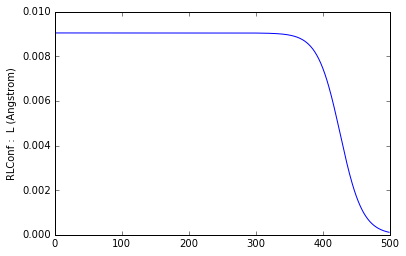

In [88]:
plt.plot(rlconfs)
plt.ylabel("RLConf :  L (Angstrom)")

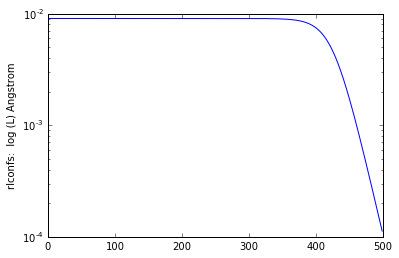

In [112]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(rlconfs)
ax.set_yscale('log')
ax.set_ylabel("rlconfs:  log (L) Angstrom")

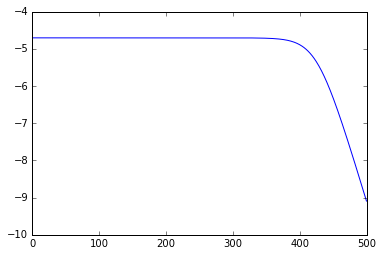

In [115]:
plt.plot(np.log(rlconfs))

### V-A theory of the Weak Interaction

The V-A theory provides a way to compute the cross section for orbital (K) electron capture by the proton

This is just the quantum mechanical Golden Rule fomula, using the Dirac spinors (relativistic 4-vectors) and the associated (4x4) Gamma matrices, and the 'fundamental' constants 

The V-A theory contains specific corrections but is not the most complete theory.  Still, these minor corrections likely have no effect for our purposes.

#### electron capture cross section matrix elements in the V-A theory

$$M_{fi}=\dfrac{G_{F}}{\sqrt{2}}\bar{u}(p_{n},s_{n})(G_{V}-G_{A}\gamma^{5})\gamma^{\mu}u(p_{p},s_{p})\times\bar{u}(k,s_{k})\gamma_{u}(1-\gamma^{5})u(s_{e},p_{e})$$

where GF = 1.16637 × 10−5 GeV−2 and the neutron lifetime is reproduced with GA = 1
and Gv = −1.285.7 , and 
$$s_{n}, s_{p},s_{k},s_{e}$$
are 2-component spin vectors for the neutron, proton, nutrino, and electron, resp.



#### Implementing the calculations

We can use an open source physics packages to generate the Dirac Gamma Matrices

### Dirac Spinors

#### Relativistic 4-vectors for particles
$$u(\overrightarrow{p},s=up)=\sqrt{E+m}\left[\begin{array}{c}
0\\
1\\
\dfrac{p_{3}}{E+m}\\
\dfrac{p_{1}+ip_{2}}{E+m}
\end{array}\right]\;\;u(\overrightarrow{p},s=down)=\sqrt{E+m}\left[\begin{array}{c}
1\\
0\\
\dfrac{p_{1}-ip_{2}}{E+m}\\
\dfrac{-p_{3}}{E+m}
\end{array}\right]$$ 

#### Complex conjugates


In [ ]:
# dirac spinors 
def spinu(p ,mass):
    s = np.diag([1,1])
    
    denom = p[0] + mass
    
    fac = np.sqrt(denom)
    phi = fac*cs
    
    wu = np.zeros([4,2], dtype=np.complex_)
    wu[0,0] = 1.0
    wu[1,1] = 1.0

    wu[2,0] = p[3] / denom
    wu[2,1] = (p[1] - p[2]*1.j) / denom
    wu[3,0] = (p[1] + p[2]*1.j) / denom
    wu[3,1] = -(p[3]) / denom

    u = wu*phi
    
    return u

In [ ]:
# dirac spinors 
def spinu(p ,mass):
    s = np.diag([1,1])
    
    denom = p[0] + mass
    
    fac = np.sqrt(denom)
    phi = fac*cs
    
    wu = np.zeros([4,2], dtype=np.complex_)
    wu[0,0] = 1.0
    wu[1,1] = 1.0

    wu[2,0] = p[3] / denom
    wu[2,1] = (p[1] - p[2]*1.j) / denom
    wu[3,0] = (p[1] + p[2]*1.j) / denom
    wu[3,1] = -(p[3]) / denom

    u = wu*phi
    
    return u

### Dirac Gamma Matrices

These are (4x4) matrices used to compute the matrix elements

https://en.wikipedia.org/wiki/Gamma_matrices

we can obtain them from

http://docs.sympy.org/dev/modules/physics/matrices.html

these are related to the PNNL code as

<pre>
mgamma =  RSW cgamma, cgamma5
</pre>

If we need better performance, we can convert to numpy arrays

http://stackoverflow.com/questions/17069864/what-is-the-best-way-to-convert-a-sympy-matrix-to-a-numpy-array-matrix

<pre>
np.array(g).astype(np.float64)
</pre>


### Using SymPy

In [90]:
import sympy
from sympy import *
from sympy.physics.matrices import mgamma
mgamma(0)

Matrix([
[1, 0,  0,  0],
[0, 1,  0,  0],
[0, 0, -1,  0],
[0, 0,  0, -1]])

$$C_{left} = 1-\gamma^{5}$$

In [91]:
cleft = diag(1,1,1,1) -mgamma(5)
cleft

Matrix([
[ 1,  0, -1,  0],
[ 0,  1,  0, -1],
[-1,  0,  1,  0],
[ 0, -1,  0,  1]])

$$C_{GVGA} = G_{V}-G_{A}\gamma^{5}$$


In [92]:
cGVGA = diag(GV,GV,GV,GV) - GA*mgamma(5)
cGVGA

Matrix([
[  1.0,     0, 1.285,     0],
[    0,   1.0,     0, 1.285],
[1.285,     0,   1.0,     0],
[    0, 1.285,     0,   1.0]])

###  diagonal 2x2 matrices  used in PNNL code

In [93]:
cs1 = diag(1,1)
cs2 = diag(1,1)
cse = diag(1,1)
csk = diag(1,1)

In [ ]:
### Stopped Here

In [ ]:
def dgprod(ekn):
    dgprod = (5.2828)*(1e-5)/np.sqrt(ekn)
    dgprod = dgprod*1e-24 # cmˆ2
    return dgprod

In [ ]:
#
#  redo as ?
#   cubar.dot(ca).dot(cu)
#
def ubaru( cubar , ca , cu , cscal ):
    cscal = 0.0
    for i1 in range(4):
        for i2 in range(4):
            cscal += cubar[i1]*ca[i1,i2]*cu[i2]
            


### Calculate Kinetic Energies of each particle 

- EKn = p1 (0) − dMn
- EKp = p2 (0) − dMp
- EKe = pe (0) − dme
- EKnu = pk(0) − dmnu



In [ ]:
#  returns 4 vectors:  p1 , p2 , pe, pk 

#  assumes exactly cubic lattic:  pep1 = pep2 = pep3 = +|- pep
def pekin(x , phi , pep ):
    
    p1 = np.zeros(4)
    p2 = np.zeros(4)
    pe = np.zeros(4)
    pk = np.zeros(4)
    
    # proton
    p2[0] = dsqrt (dMp**2 + 3.0*pep**2)
    p2[1] = -pep
    p2[2] = -pep
    p2[3] = -pep
    
    # electron
    pe[0] = dsqrt (dme**2 + 3.0*pep**2)
    pe[1] = pep
    pe[2] = pep
    pe[3] = pep
    
    Etot = p2[0] + pe[0]

    Eknu = (( Etot-dmnu)**2 - dMn**2)/(2.0*Etot )
    Ekn = (( Etot-dMn)**2 - dmnu**2)/(2.0*Etot )
    pnu = np.sqrt((Eknu+dmnu)**2 - dmnu**2)
    
    pk[0] = Eknu + dmnu
    pk[1] = pnu*np.sqrt(1.0 - x**2)*cos(phi)
    pk[2] = pnu*np.sqrt(1.0 - x**2)*sin(phi)
    pk[3] = pnu*x
    
    # vector element wise addition
    # neutron
    p1 = p2 + pe - pk
    
    return p1, p2, pe, pk